In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Validation Curves

- Tool to evaluate how model generalization performance varies when changing hyperparamaters.
- Knowing how a hyperparameter influences a validation score helps with overfitting/underfitting

In [2]:
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.learning_curve import validation_curve

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python3.5/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [3]:
# Load the standard digits library
digits = load_digits()
X, y = digits.data, digits.target

In [10]:
# Takes an estimator, (Randomforest)
training_scores, validation_scores = validation_curve(RandomForestClassifier(n_estimators=50, n_jobs=-1), X, y,
                                                      param_name="max_depth", param_range=range(1, 10), cv=5)

In [11]:
# 9 Paramater Values, Cross validation of 5
training_scores.shape

(9, 5)

In [6]:
def plot_validation_curve(parameter_values, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(parameter_values, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameter_values, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
    plt.plot(parameter_values, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(parameter_values, validation_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.ylim(validation_scores_mean.min() - .1, train_scores_mean.max() + .1)
    plt.legend(loc="best")

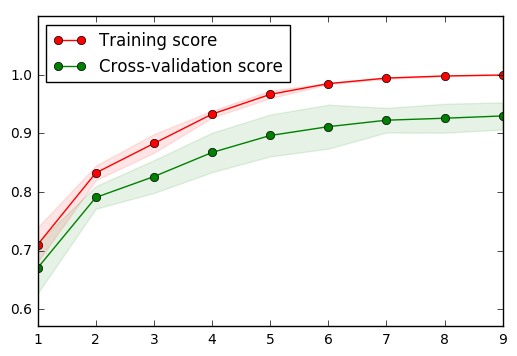

In [12]:
# Low values of maximum depth, we underfit the data. Both training and vlaidation scores are low
# Using larger depths, the scores both increase and diverge.

plot_validation_curve(range(1, 10), training_scores, validation_scores)

In [13]:
from sklearn.svm import LinearSVC

# Log range from 0.0001 to 10
Cs = [0.00001, 0.0001, 0.001, 0.01, 0.1 , 1, 10]

training_scores, test_scores = validation_curve(LinearSVC(), X, y,
                                                param_name="C", param_range=Cs)


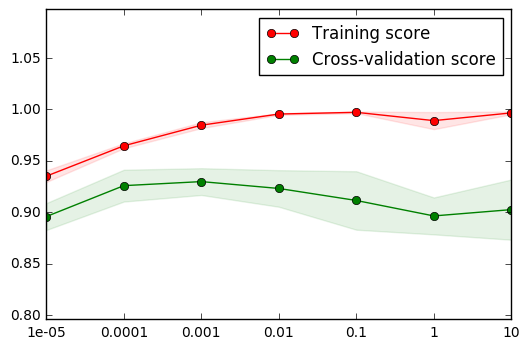

In [9]:
# Underfitting for low values of C
# Overfitting for high values of C
# Sweeetspot at 0.001
# Large values of C, there is more variance


plot_validation_curve(range(7), training_scores, test_scores)
plt.xticks(range(7), Cs);